## Q1. 引入 train.csv 資料集 、 matplotlib 、 seaborn

In [1]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Q2. 繪製票價的直方圖
### x 座標 y 座標 和 title 均要有文字

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

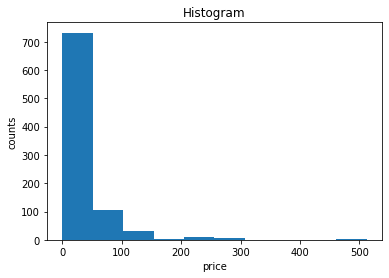

In [9]:
plt.xlabel("price")
plt.ylabel("counts")
plt.title("Histogram")
plt.hist(train.Fare)

## Q3. 分組性別繪製存活數的長條圖

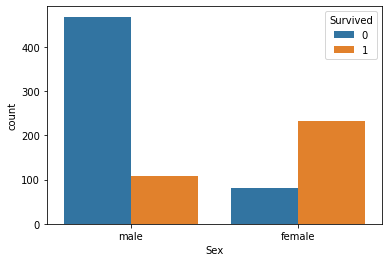

In [10]:
sns.countplot(train['Sex'], hue=train['Survived'])

## Q4. 分組艙等，繪製票價與存活數的盒狀圖

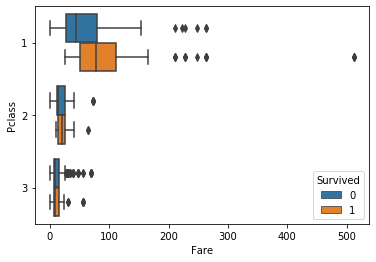

In [13]:
sns.boxplot(y='Pclass', x='Fare', hue='Survived', data=train, orient='h')c

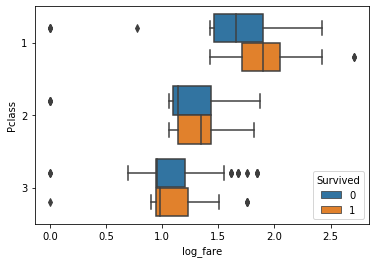

In [15]:
import numpy as np
# 為了要讓清楚看出票價的分佈，可以將票價取log
train['log_fare'] = (train['Fare'] +1).map(lambda x: np.log10(x) if x >0 else 0)
sns.boxplot(y='Pclass', x='log_fare', hue='Survived', data=train, orient='h')

## Q5. 依照性別分兩張圖繪製，繪製年齡與票價的散佈圖，另外必須要標示該點是否存活

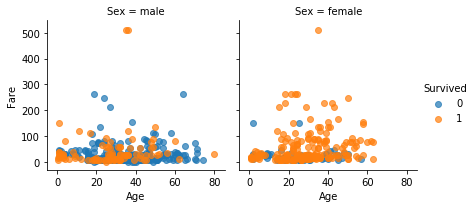

In [19]:
g = sns.FacetGrid(train, col = "Sex", hue = "Survived")
g.map(plt.scatter, "Age", "Fare", alpha =.7)
g.add_legend();

## Q6. 依照上船地點繪製3個小提琴圖相對票價，另外必須要標示該點是否存活

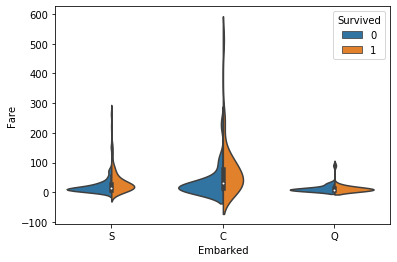

In [24]:
sns.violinplot(x='Embarked',y='Fare',data=train, hue='Survived',split=True)

## Q6. 繪製票價與年齡的 jointplot

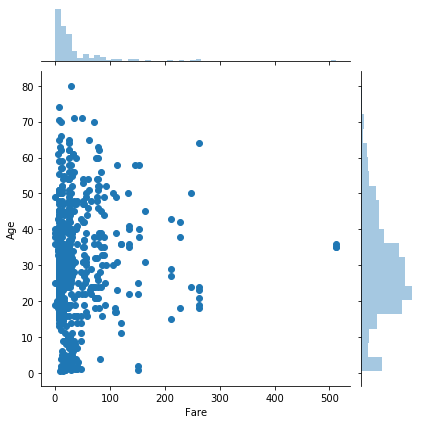

In [25]:
sns.jointplot(x='Fare', y='Age', data=train)

## Q6. 繪製train資料集的相關係數熱力圖

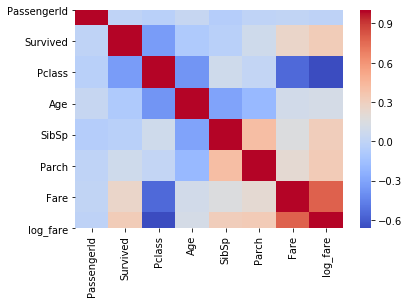

In [26]:
cor = train.corr()
sns.heatmap(cor, cmap='coolwarm')

## Q7. 以不同欄位分別繪製存活數的長條圖
### ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'] 用子圖繪製

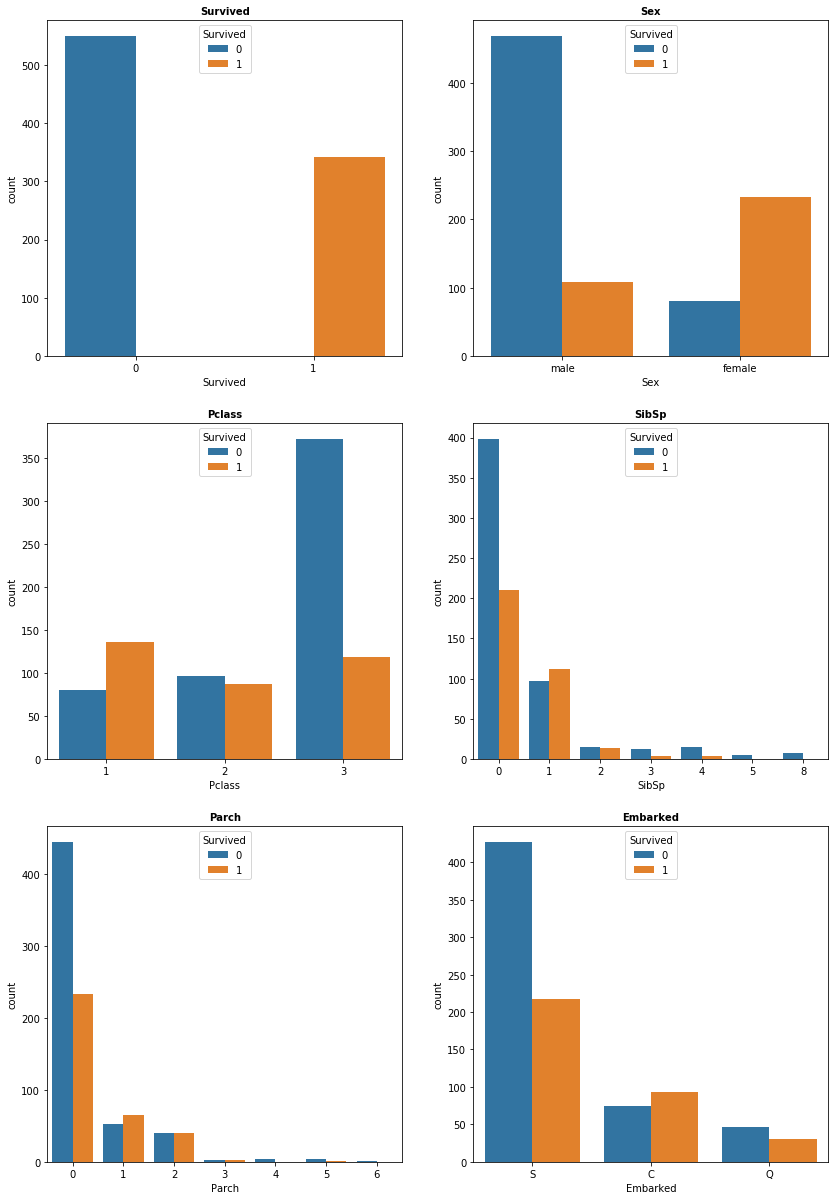

In [35]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
n_rows = 3
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*7))

for r in range(0, n_rows):
    for c in range(0, n_cols):  
        i = (r * n_cols) +c       
        ax = axs[r][c]
        sns.countplot(train[cols[i]], hue=train["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=10, fontweight='bold')
        ax.legend(title="Survived", loc='upper center') 

## Q8. 依據不同姓氏計算存活率
### Hint: 可以分成 Mr Miss Mrs Master 其他為 Others

In [38]:
train.Name.str.extract(r'([A-Za-z]+)\.').value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
dtype: int64

In [39]:
train['Title'] = train.Name.str.extract(r'([A-Za-z]+)\.')

In [40]:
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                       ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [42]:
train.Title.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Title, dtype: int64

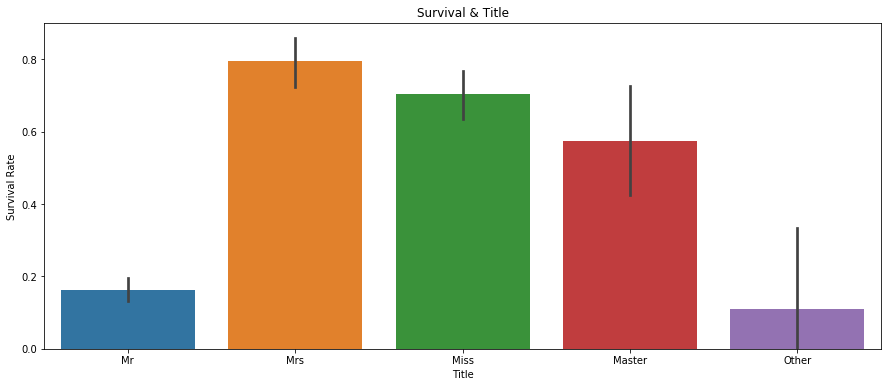

In [46]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Title' , y='Survived' , data = train)
plt.ylabel("Survival Rate")
plt.title("Survival & Title")
plt.show()